In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [3]:
#load data into the notebook
Distribution_Data = pd.read_csv('C:/Users/HP/Desktop/data set/Distribution_network_Analysis/ev_distribution_dataset.csv')
Geospatial_Data = pd.read_csv('C:/Users/HP/Desktop/data set/Distribution_network_Analysis/geospatial_dataset.csv')
Weather_Data = pd.read_csv('C:/Users/HP/Desktop/data set/Distribution_network_Analysis/weather_dataset.csv')

In [4]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [5]:
Geospatial_Data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [6]:
Weather_Data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


In [7]:
#Check data types to know if there is missing values in Distrubution Dt
Distribution_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


In [8]:
#Decription of numerical Columns
Distribution_Data.describe()

,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [9]:
#Check data types to know if there is missing values for geospatial
Geospatial_Data.info()

#Decription of numerical Columns
Geospatial_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [10]:
#Check data types to know if there is missing values for weather
Weather_Data.info()

#Decription of numerical Columns
Weather_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


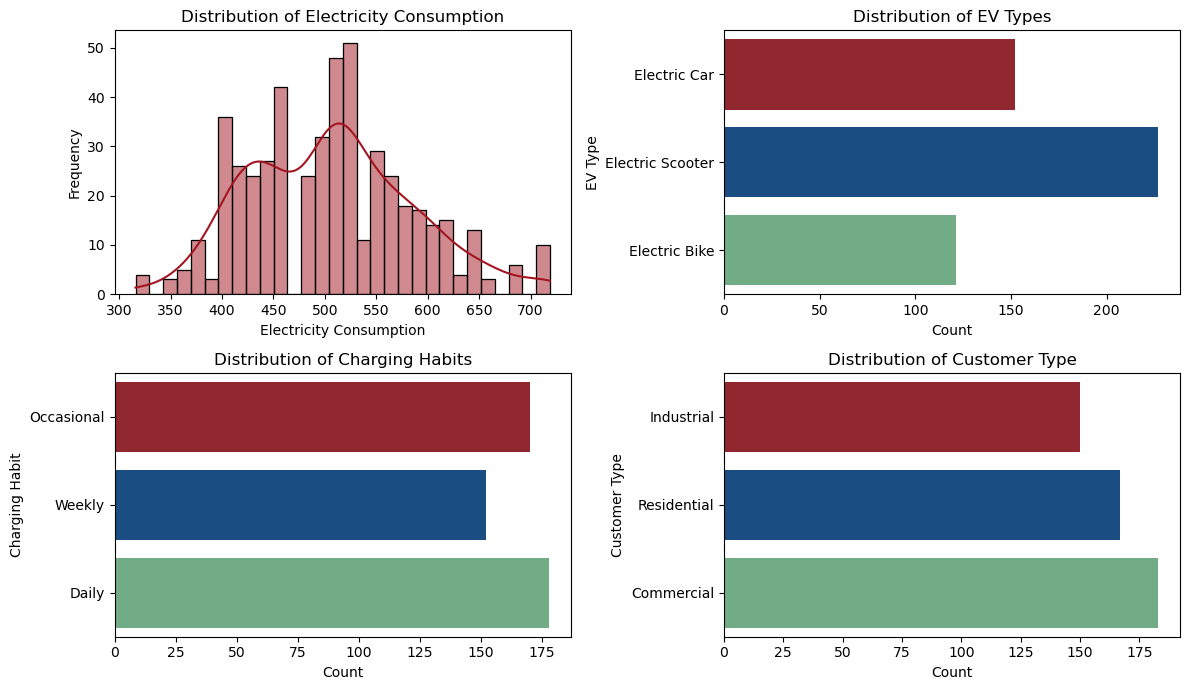

In [11]:
import warnings

#Univariate Analysis
#Setting the Style and Color paletter of the plots
custom_palette = ["#A31621", "#094D92", "#68B684"]
sns.set_palette(custom_palette)

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Replace infinite values with NaN
Distribution_Data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally drop rows with NaN values if you want to exclude them from plots
Distribution_Data.dropna(inplace=True)

#Create a 2x2 subplot grid
fix, axes = plt.subplots(2, 2, figsize= (12, 7))


#plot distribution of electricity consumption
sns.histplot(data=Distribution_Data, x='Electricity_Consumption (kWh)', bins= 30, kde = True, ax=axes [0, 0])
axes[0, 0]. set_title("Distribution of Electricity Consumption")
axes[0, 0]. set_xlabel("Electricity Consumption")
axes[0, 0]. set_ylabel("Frequency")

#plot the distribution of EV types
sns.countplot(data=Distribution_Data, y="EV_Type", ax=axes[0, 1])
axes[0, 1]. set_title("Distribution of EV Types")
axes[0, 1]. set_xlabel("Count")
axes[0, 1]. set_ylabel("EV Type")

#Plot the distribution of Charging habits
sns.countplot(data=Distribution_Data, y="Charging_Habit", ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Charging Habits")
axes[1, 0].set_xlabel("Count")
axes[1, 0].set_ylabel("Charging Habit")

#plot the distribution of Customer type
sns.countplot(data=Distribution_Data, y="Customer_Type", ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Customer Type")
axes[1, 1].set_xlabel("Count")
axes[1, 1].set_ylabel("Customer Type")

#Adjust layout plot
plt.tight_layout()

#Display the plots
plt.show()

In [12]:
#Bivariate Analysis
#Extraction of Lat and Long for EV Charging Station
Distribution_Data['ev_latitude'] = Distribution_Data ['EV_Charging_Station_Location'].apply(
     lambda x: float(x.split(",")[0].replace("(", "").strip()))
Distribution_Data['ev_longitude'] = Distribution_Data ['EV_Charging_Station_Location'].apply(
     lambda x: float(x.split(",")[1].replace(")", "").strip()))

#Extraction of the long And Lat for the substation Location
Geospatial_Data['Substation_latitude'] = Geospatial_Data ['Substation_Location'].apply(
      lambda x: float(x.split(",")[0].replace("(", "").strip()))
Geospatial_Data['Substation_longitude'] = Geospatial_Data ['Substation_Location'].apply(
      lambda x: float(x.split(",")[1].replace(")", "").strip()))

#Show/Drop the Original location columns to clean up the datafrom
Distribution_Data = Distribution_Data.drop(columns = ['EV_Charging_Station_Location'])
Geospatial_Data = Geospatial_Data.drop(columns = ['Substation_Location'])

In [13]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [14]:
Geospatial_Data.head()

,Substation_ID,Transmission_Line_Capacity (MW),Substation_latitude,Substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


In [15]:
!pip install --upgrade geopandas

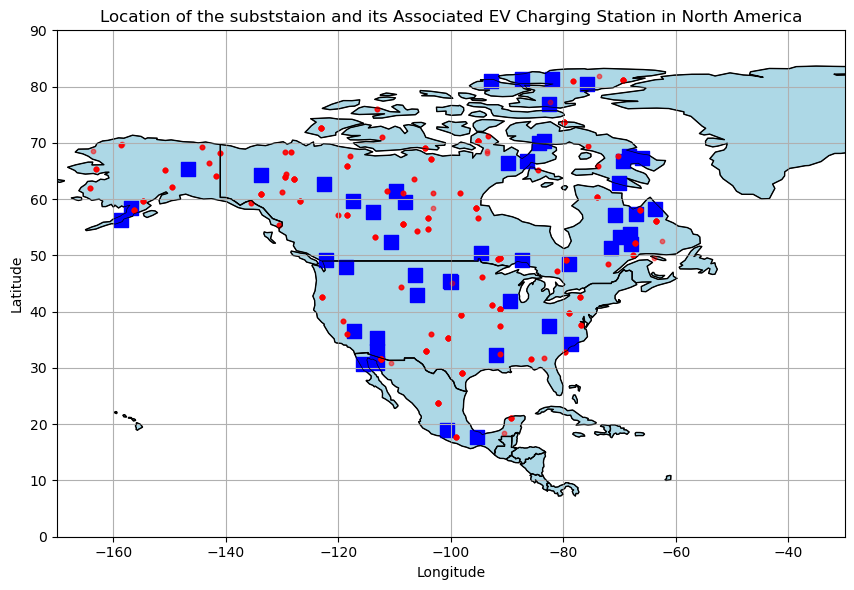

In [16]:
#Converting the dataframes to Geodataframes
ev_gdf = gpd.GeoDataFrame(Distribution_Data,
                         geometry=gpd.points_from_xy(Distribution_Data.ev_longitude, Distribution_Data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_Data,
                         geometry=gpd.points_from_xy(Geospatial_Data.Substation_longitude, Geospatial_Data.Substation_latitude))


#Load the world map data
world = gpd.read_file('C:/Users/HP/Downloads/ne_110m_admin_0_countries_lakes')

#Filter the map to North America
north_america = world[world['CONTINENT']== "North America"]

#plotting the map for noth America
fig, ax = plt.subplots(figsize= (10, 6))
north_america.boundary.plot(ax=ax, linewidth= 0.5, color= 'black')
north_america.plot(ax=ax, color='lightblue', edgecolor= 'black')

# Set the limits to include all of North America
ax.set_xlim([-170, -30])
ax.set_ylim([0, 90])

#Plotting the substation on the map
substation_gdf.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substation')

#Plotting Ev Charging station on the map
ev_gdf.plot(ax=ax, markersize = 10, color = 'red', label= 'EV charging station', alpha=0.5)

#Set title and axis labels
plt.title('Location of the subststaion and its Associated EV Charging Station in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.grid(True)
plt.legend
plt.tight_layout()
plt.show()

In [17]:
from shapely.geometry import LineString

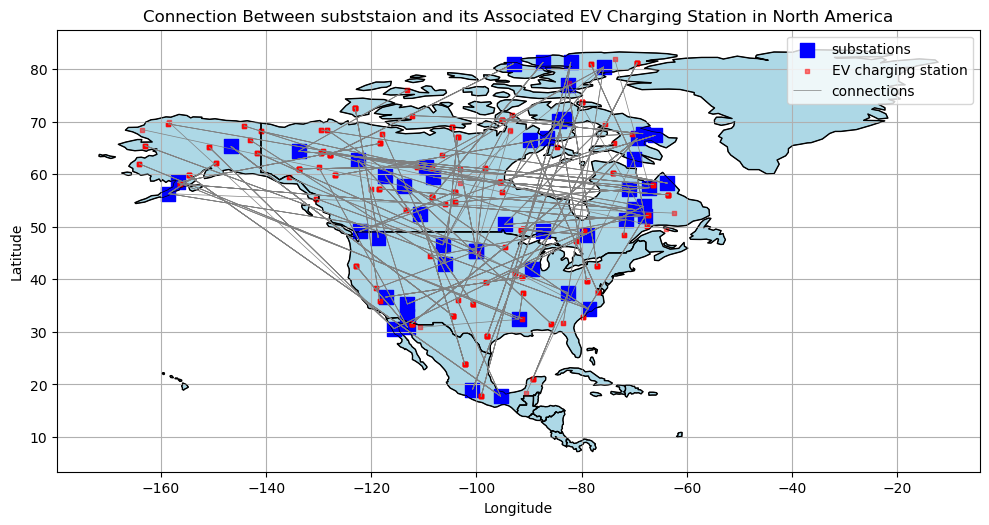

In [18]:
#Converting the dataframes to Geodataframes
ev_gdf = gpd.GeoDataFrame(Distribution_Data,
                         geometry=gpd.points_from_xy(Distribution_Data.ev_longitude, Distribution_Data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_Data,
                         geometry=gpd.points_from_xy(Geospatial_Data.Substation_longitude, Geospatial_Data.Substation_latitude))

#Creation of lines connecting each substation to it's associated ev charging stations
lines= []
for _, ev_row in Distribution_Data.iterrows():
    substation = Geospatial_Data[Geospatial_Data['Substation_ID'] == ev_row["Substation_ID"]].iloc[0]
    line=[(ev_row['ev_longitude'], ev_row['ev_latitude']),
           (substation['Substation_longitude'], substation['Substation_latitude'])]
    lines.append(line)
    
line_gdf=  gpd.GeoDataFrame(geometry=[LineString(line) for line in lines])

#Load the world map data
world = gpd.read_file('C:/Users/HP/Downloads/ne_110m_admin_0_countries_lakes')

#Filter the map to North America
north_america = world[world['CONTINENT']== "North America"]

#plotting the map for noth America
fig, ax = plt.subplots(figsize= (10, 6))
north_america.boundary.plot(ax=ax, linewidth= 0.5, color= 'black')
north_america.plot(ax=ax, color='lightblue', edgecolor= 'black')

#Plotting the substation on the map
substation_gdf.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substations')

#Plotting Ev Charging station on the map
ev_gdf.plot(ax=ax, marker= 's', markersize = 10, color = 'red', label= 'EV charging station', alpha=0.5)

#Plotting of Line

line_gdf.plot(ax=ax, linewidth= 0.5, color= 'gray', label= 'connections')

#Set title and axis labels
plt.title('Connection Between subststaion and its Associated EV Charging Station in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

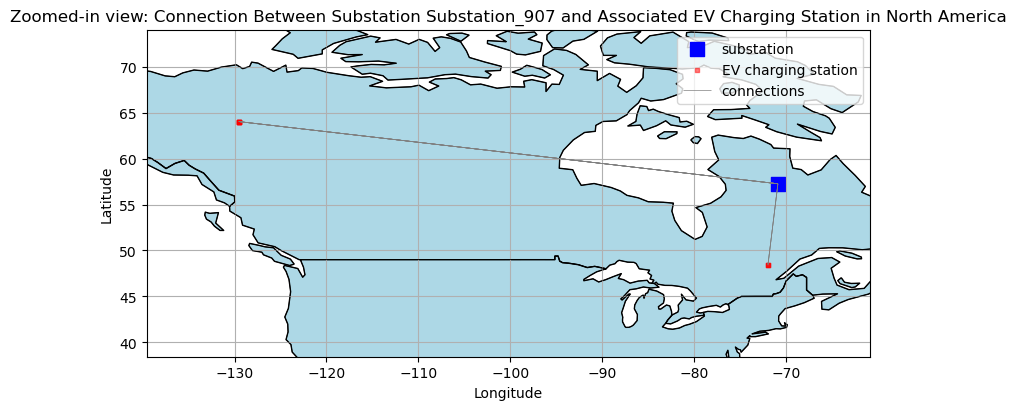

In [19]:
#Trying to study the connection of substation 1 to Evcharging stations by zooming in the substation
#filer for the first substation
selected_substation = Geospatial_Data.iloc[0]
associated_ev = Distribution_Data[Distribution_Data['Substation_ID'] == selected_substation['Substation_ID']]

#Convertion to Geodataframes
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry= gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), geometry=gpd.points_from_xy(
    [selected_substation['Substation_longitude']], [selected_substation['Substation_latitude']]))

lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], selected_substation['Substation_longitude'], selected_substation['Substation_latitude'])
                                                  for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

#Load the world map data
world = gpd.read_file('C:/Users/HP/Downloads/ne_110m_admin_0_countries_lakes')

#Filter the map to North America
north_america = world[world['CONTINENT']== "North America"]
                                                  
                                                  
#Determing the bounding box for the zoomed in area
buffer = 10 #degree
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]
                                                  
#plotting the map for noth America
fig, ax = plt.subplots(figsize= (8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color= 'black')
north_america.plot(ax=ax, color='lightblue', edgecolor= 'black')

#Plotting the substation on the map
substation_gdf_selected.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substation')

#Plotting Ev Charging station on the map
ev_gdf_selected.plot(ax=ax, marker= 's', markersize = 10, color = 'red', label= 'EV charging station', alpha=0.5)

#Plotting of Line
line_gdf_selected.plot(ax=ax, linewidth= 0.5, color= 'gray', label= 'connections')

#Setting the zoomed in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)                                                  

#Set title and axis labels
plt.title(f"Zoomed-in view: Connection Between Substation {selected_substation['Substation_ID']} and Associated EV Charging Station in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()                                                  

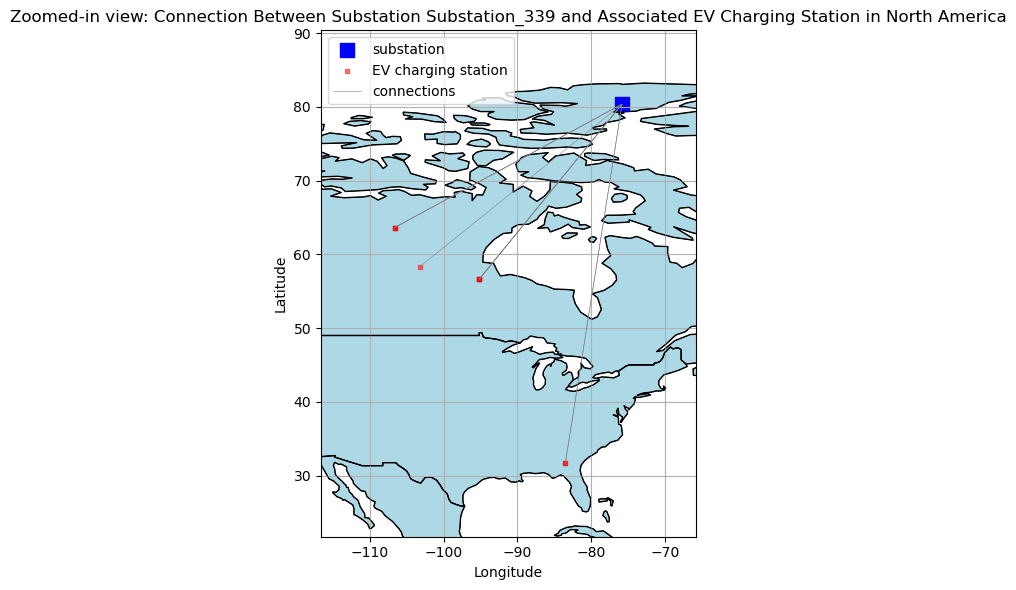

In [20]:
#Trying to study the connection of substation 1 to Evcharging stations by zooming in the substation
#filer for the first substation
selected_substation = Geospatial_Data.iloc[2]
associated_ev = Distribution_Data[Distribution_Data['Substation_ID'] == selected_substation['Substation_ID']]

#Convertion to Geodataframes
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry= gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), geometry=gpd.points_from_xy(
    [selected_substation['Substation_longitude']], [selected_substation['Substation_latitude']]))

lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], selected_substation['Substation_longitude'], selected_substation['Substation_latitude'])
                                                  for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

#Load the world map data
world = gpd.read_file('C:/Users/HP/Downloads/ne_110m_admin_0_countries_lakes')

#Filter the map to North America
north_america = world[world['CONTINENT']== "North America"]
                                                  
                                                  
#Determing the bounding box for the zoomed in area
buffer = 10 #degree
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]
                                                  
#plotting the map for noth America
fig, ax = plt.subplots(figsize= (10, 6))
north_america.boundary.plot(ax=ax, linewidth=0.5, color= 'black')
north_america.plot(ax=ax, color='lightblue', edgecolor= 'black')

#Plotting the substation on the map
substation_gdf_selected.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substation')

#Plotting Ev Charging station on the map
ev_gdf_selected.plot(ax=ax, marker= 's', markersize = 10, color = 'red', label= 'EV charging station', alpha=0.5)

#Plotting of Line
line_gdf_selected.plot(ax=ax, linewidth= 0.4, color= 'gray', label= 'connections')

#Setting the zoomed in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)                                                  

#Set title and axis labels
plt.title(f"Zoomed-in view: Connection Between Substation {selected_substation['Substation_ID']} and Associated EV Charging Station in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()                                                  

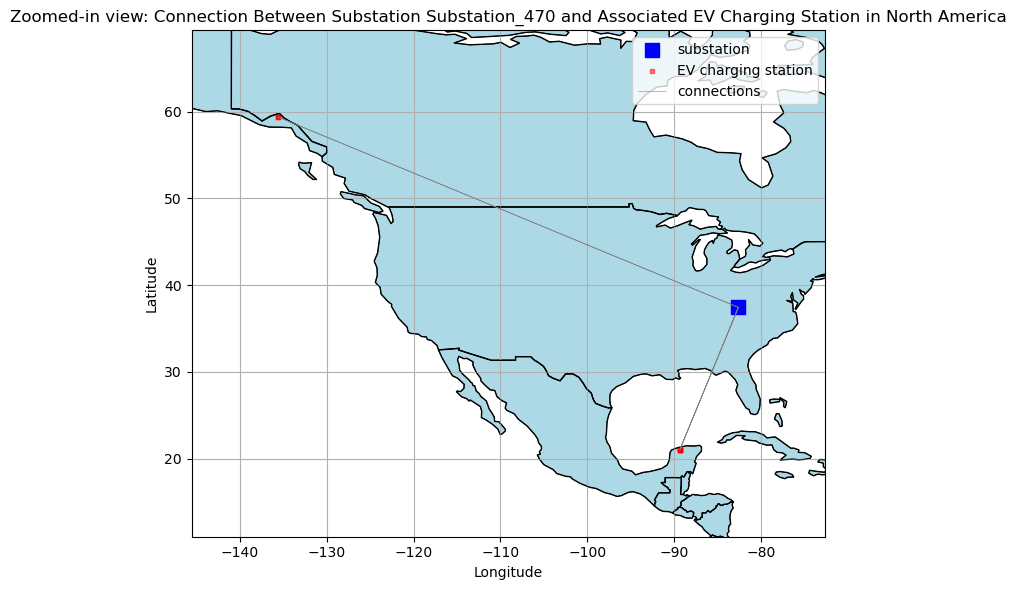

In [21]:
#Trying to study the connection of substation 1 to Evcharging stations by zooming in the substation
#filer for the first substation
selected_substation = Geospatial_Data.iloc[49]
associated_ev = Distribution_Data[Distribution_Data['Substation_ID'] == selected_substation['Substation_ID']]

#Convertion to Geodataframes
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry= gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), geometry=gpd.points_from_xy(
    [selected_substation['Substation_longitude']], [selected_substation['Substation_latitude']]))

lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], selected_substation['Substation_longitude'], selected_substation['Substation_latitude'])
                                                  for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

#Load the world map data
world = gpd.read_file('C:/Users/HP/Downloads/ne_110m_admin_0_countries_lakes')

#Filter the map to North America
north_america = world[world['CONTINENT']== "North America"]
                                                  
                                                  
#Determing the bounding box for the zoomed in area
buffer = 10 #degree
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]
                                                  
#plotting the map for noth America
fig, ax = plt.subplots(figsize= (10, 6))
north_america.boundary.plot(ax=ax, linewidth=0.5, color= 'black')
north_america.plot(ax=ax, color='lightblue', edgecolor= 'black')

#Plotting the substation on the map
substation_gdf_selected.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substation')

#Plotting Ev Charging station on the map
ev_gdf_selected.plot(ax=ax, marker= 's', markersize = 10, color = 'red', label= 'EV charging station', alpha=0.5)

#Plotting of Line
line_gdf_selected.plot(ax=ax, linewidth= 0.4, color= 'gray', label= 'connections')

#Setting the zoomed in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)                                                  

#Set title and axis labels
plt.title(f"Zoomed-in view: Connection Between Substation {selected_substation['Substation_ID']} and Associated EV Charging Station in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()                                                  

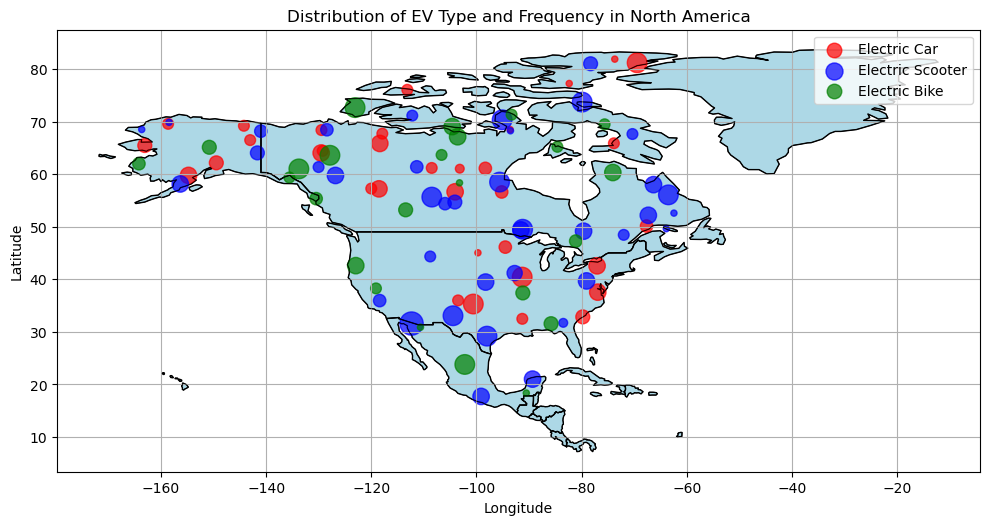

In [22]:
#Group by the Location and the ev type, then count the number of stations
grouped_data = Distribution_Data.groupby(['ev_latitude', 'ev_longitude', 'EV_Type']).size().reset_index(name='count')

#convert grouped data to GeoDataFrame
grouped_gdf = gpd.GeoDataFrame(grouped_data,
                             geometry=gpd.points_from_xy(grouped_data.ev_longitude, grouped_data.ev_latitude))

#Load the world map data and filter for North America
world = gpd.read_file('C:/Users/HP/Downloads/ne_110m_admin_0_countries_lakes')
north_america = world[world['CONTINENT']== "North America"]

#plotting the map for noth America
fig, ax = plt.subplots(figsize= (10, 6))

north_america.boundary.plot(ax=ax, linewidth=0.5, color= 'black')
north_america.plot(ax=ax, color='lightblue', edgecolor= 'black')

#Designate color to EV_Type
colors = {'Electric Car': 'red', 'Electric Scooter': 'blue', 'Electric Bike': 'green'}

#plotting Ev type
for ev_type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == ev_type]
    sub_gdf.plot(ax=ax, markersize=sub_gdf['count']* 20, color=color, label=ev_type, alpha=0.7)

# Set grid before plotting the map and data points
ax.grid(True, zorder=0)  # zorder=1 ensures the grid lines are beneath
    
#Set title and axis labels
plt.title('Distribution of EV Type and Frequency in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()    

In [23]:
# Network Capacity Assessment
#Group the ev distribtion data by substation id and calculate the total electricity consumption for each substation
total_consumption_per_substation = Distribution_Data.groupby ('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

#merging the total consumption data with geospatial data
network_capacity_data = pd.merge(Geospatial_Data, total_consumption_per_substation, on= 'Substation_ID')

#Rename the columns for better understanding
network_capacity_data.rename(columns={'Electricity_Consumption (kWh)': 'Total_Consumption (kwh)'}, inplace= True)

#Calculating the Ration of total consumption to transmission line capacity
#conversion: 1 MW = 1000 (kwh)

network_capacity_data['Consumption_to_Capacity_Ratio']= network_capacity_data['Total_Consumption (kwh)'] / (network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)

In [24]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),Substation_latitude,Substation_longitude,Total_Consumption (kwh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


In [25]:
from shapely.geometry import Point

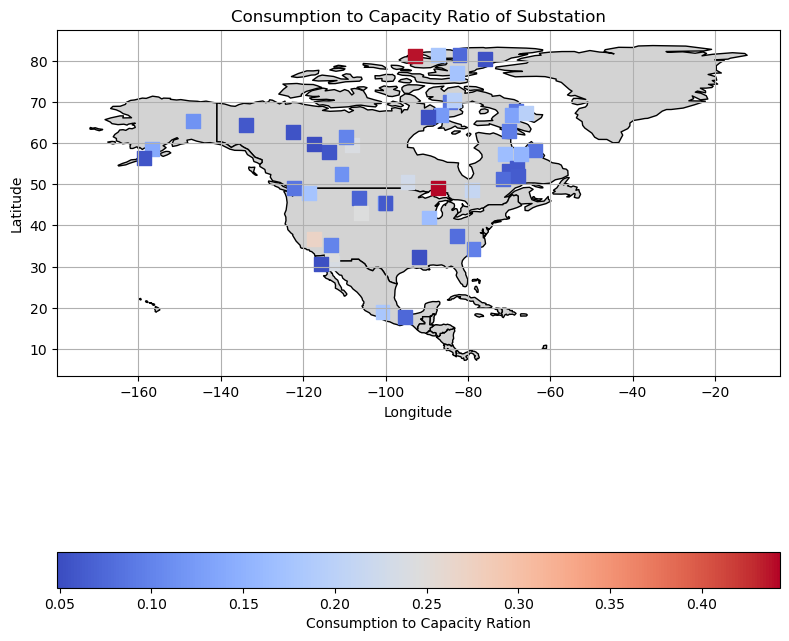

In [26]:
#Creation of the Geodataframe for the network capacity for the dataframe
geometry_network_capacity = [Point(lon, lat) for lon, lat in zip (network_capacity_data['Substation_longitude'], network_capacity_data['Substation_latitude'])]
gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry=geometry_network_capacity)

#Plotting in choropleth style
fig, ax = plt.subplots(figsize=(8, 12))
north_america.plot(ax=ax, color= 'lightgray', edgecolor = 'black')
gdf_network_capacity.plot(column='Consumption_to_Capacity_Ratio', cmap='coolwarm', legend=True,
                        marker='s', markersize=100, ax=ax, legend_kwds={'label': "Consumption to Capacity Ration",'orientation': "horizontal"})
    
ax.set_title("Consumption to Capacity Ratio of Substation")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True) #The gridline did not show so i set it in with this
plt.tight_layout()
plt.show()

In [27]:
#group by the substation_Id for the number of EV's
ev_counts= Distribution_Data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

#merge the network capacity data with the EV counts
final_data= pd.merge(ev_counts, network_capacity_data, on= 'Substation_ID')

#Correlation
correlation_ratio= final_data['Number_of_EVs'].corr(final_data['Consumption_to_Capacity_Ratio'])


In [28]:
correlation_ratio

-0.10944923035990646

<function matplotlib.pyplot.show(close=None, block=None)>

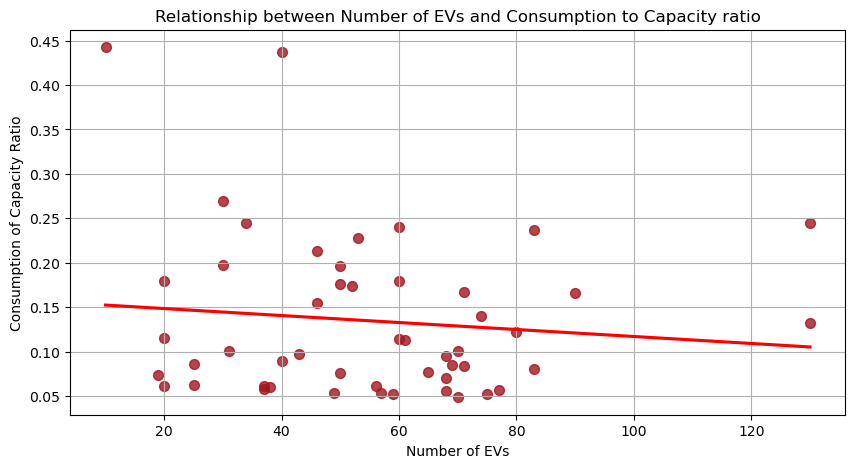

In [29]:
#scatter plot with regression line
plt.figure(figsize =(10,5))
sns.regplot(x='Number_of_EVs', y= 'Consumption_to_Capacity_Ratio', data= final_data, scatter_kws={'s':50}, line_kws={'color': 'red'}, ci=None)
plt.title('Relationship between Number of EVs and Consumption to Capacity ratio')
plt.xlabel('Number of EVs')
plt.ylabel('Consumption of Capacity Ratio')
plt.grid(True)
plt.tight_layout
plt.show


In [30]:
#Identifying Bottlenects
#By Analyzing the map, we can identify the substation and areas that are potential bottlenecks in the distribution network, 
#These are the area where the Consumption_to_Capacity_Ratio is high

#filtering c2c greater than 1
bottleneck_substation = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio']>= 0.9]

In [31]:
#displaying 
bottleneck_substation

,Substation_ID,Transmission_Line_Capacity (MW),Substation_latitude,Substation_longitude,Total_Consumption (kwh),Consumption_to_Capacity_Ratio


# Optimizing network Upgrades
For optimizing network upgrade focus on substation with potential to have high consumption_to_capacity_Ratio. Upgrading the transmission lines or adding additional capacity in these areas can help in managing the potential to hav increased load effecively and ensuring grid reliability

Additionally, lets note from the analysis
 . The geographyical distribution of Ev charging station, where EV charging station are quite far from the SubStations.
 Also let the business look into.
 .Potential future growth in EV adoption in diffrent areas
 .Costs associated with different upgrade options.


In [32]:
top_5_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),Substation_latitude,Substation_longitude,Total_Consumption (kwh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
27,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
20,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
42,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


# Correlation with weather Data
. Analyzing the correlation between weather data and electricity consumption can provide insight into how weather conditions affect the distribution network

In [33]:
# Merge weather data with the distribution data
merged_data = pd.merge(Distribution_Data, Weather_Data, on= ['Timestamp', 'Substation_ID'])

#Calculate the correclation between weather condition and electricity consumption
correlation_matrix = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

#display
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

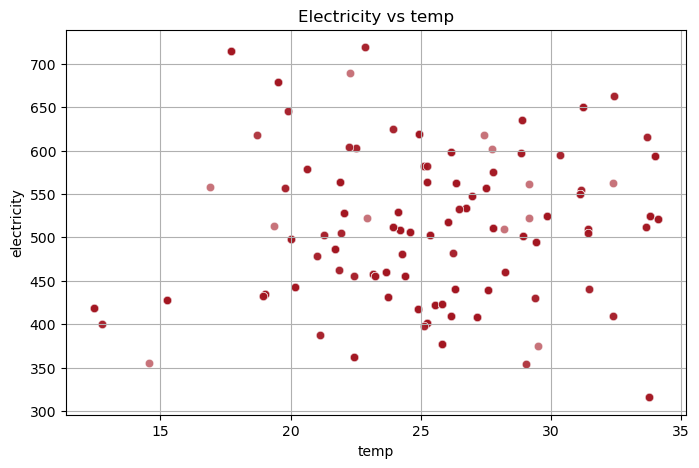

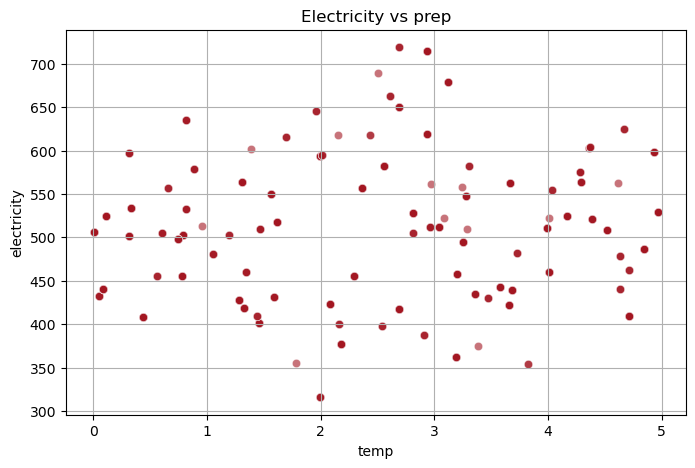

In [34]:
#Electricity Consumption is temp
plt.figure(figsize= (8, 5))
sns.scatterplot(data=merged_data, x="Temperature (°C)", y= "Electricity_Consumption (kWh)", alpha= 0.6)
plt.title("Electricity vs temp")
plt.xlabel("temp")
plt.ylabel("electricity")
plt.grid(True)
plt.show


#Electricity vs Precipitation
plt.figure(figsize= (8, 5))
sns.scatterplot(data=merged_data, x="Precipitation (mm)", y= "Electricity_Consumption (kWh)", alpha= 0.6)
plt.title("Electricity vs prep")
plt.xlabel("temp")
plt.ylabel("electricity")
plt.grid(True)
plt.show


# Insights
1. - Electricity Consumption: The electricity consumption is primarily around 500 kWh, with occasional instances of higher usage. This indicates varied demand at different times and locations.
2. - EV Types and Charging Habits: Electric scooters are the most common type of EV. Most customers charge their EVs daily, suggesting a consistent daily load on the distribution network.
3. - Consumer Type: The majority of customers are commercial consumers.
4. - Geospatial Distribution: The spatial distribution of substations and EV charging stations is widespread.
5. - EV Charging Stations: The EV charging stations appear to be located far from their corresponding substations.
6. - Network Capacity: Some substations have a high consumption-to-capacity ratio, indicating potential bottlenecks and overloads in the network. There is no correlation between the number of EVs per substation and the consumption-to-capacity ratio, indicating that the number of EVs is not a factor in network overload.
7. - Weather Correlation: The correlation between weather conditions (temperature and precipitation) and electricity consumption is weak in the current dataset, suggesting that other factors might be more influential in affecting electricity consumption.


# The Optimization Strategy/ Recommendation
Based on the analysis conducted and the business problem at hand, the following recommendations should be incorporated into the business strategy:

1. **Prioritize Substation Upgrades**:
   - Upgrade High-Ratio Substations: Focus on upgrading substations where the consumption-to-capacity ratio is high, indicating potential overloads.
   - Enhance Transmission Lines: Upgrade transmission lines, especially in areas where EV charging stations are located far from their corresponding substations, to improve efficiency and reduce losses.

2. **Geospatial Analysis for Upgrade Planning**:
   - Optimal Location Identification: Use geospatial analysis to determine the best locations for new substations or upgrades to existing ones, considering factors such as proximity to high-demand areas (high consumption-to-capacity ratio) and geographical constraints.
   - Data-Driven Decisions: Incorporate GIS(Geographical information system) tools to analyze spatial data and make informed decisions on infrastructure placement.

3. **Demand-Side Management**:
   - Load Balancing: Implement demand-side management strategies to balance the load on the grid, such as encouraging customers to charge their EVs during off-peak hours through incentives or dynamic pricing.
   - Smart Charging Solutions: Promote smart charging solutions that allow for automated scheduling of EV charging during low-demand periods.

4. **Advanced Monitoring and Analysis**:
   - Continuous Monitoring: Deploy advanced monitoring systems to continuously track the health and performance of the distribution network, enabling proactive maintenance and quick response to issues.
   - Predictive Analytics: Use analytics to predict potential overloads and optimize network operations, reducing the risk of outages.

5. **Cost-Benefit Analysis**:
   - Comprehensive Evaluation: Conduct a thorough cost-benefit analysis for different upgrade options, considering the costs of upgrades, operational costs, potential revenue from increased capacity, and the impact on service reliability and customer satisfaction.
   - Strategic Investments: Make strategic investments based on the cost-benefit analysis to ensure the most efficient use of resources.

6. **Customer Engagement**:
   - Understand Needs and Expectations: Engage with customers to understand their needs and expectations, ensuring that the upgrades align with customer demands.
   - Clear Communication: Provide clear communication about network upgrades, highlighting how these changes will enhance service reliability and meet the growing demand for EV charging.

7. **Continuous Improvement**:
   - Performance Monitoring: Continuously monitor and assess the performance of the distribution network, gathering feedback from customers and other stakeholders.
   - Iterative Enhancements: Use the feedback to make ongoing improvements and optimizations to the network, ensuring it evolves to meet future demands and challenges.

By implementing these recommendations, the distribution network can be optimized for better efficiency, reliability, and sustainability, addressing the identified issues and preparing for future growth in EV demand and electricity consumption.